In [8]:
!mkdir -p ~/.kaggle


In [9]:
!cp kaggle.json ~/.kaggle/


In [10]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 194MB/s]
100% 1.06G/1.06G [00:05<00:00, 201MB/s]


In [11]:
!unzip dogs-vs-cats.zip -d ./dogs-vs-cats


Streaming output truncated to the last 5000 lines.
  inflating: ./dogs-vs-cats/train/dogs/dog.4419.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.442.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4420.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4421.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4422.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4424.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4425.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4426.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4427.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4431.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4433.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4436.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4438.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4439.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.444.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4440.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4441.jpg  
  inflating: ./dogs-vs-cats/train

In [12]:
# 🧠 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D,
                                     Dropout, Flatten,BatchNormalization )
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential

In [13]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [15]:
model = Sequential()

# Convolution + Activation + Pooling
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Another Convolution Block
model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Another Convolution Block
model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


# Flatten + Fully Connected Layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Binary output

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 80ms/step - accuracy: 0.5570 - loss: 2.7020 - val_accuracy: 0.6142 - val_loss: 0.6680
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 73ms/step - accuracy: 0.6689 - loss: 0.6303 - val_accuracy: 0.6210 - val_loss: 0.6709
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.7469 - loss: 0.5073 - val_accuracy: 0.6888 - val_loss: 0.8019
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 81ms/step - accuracy: 0.7865 - loss: 0.4605 - val_accuracy: 0.7400 - val_loss: 0.5191
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8265 - loss: 0.3882 - val_accuracy: 0.7334 - val_loss: 0.6315
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8511 - loss: 0.3389 - val_accuracy: 0.7656 - val_loss: 0.5317
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8855 - loss: 0.2806 - val_accuracy: 0.7884 - val_loss: 0.5589
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9226 - loss: 0.1984 - 

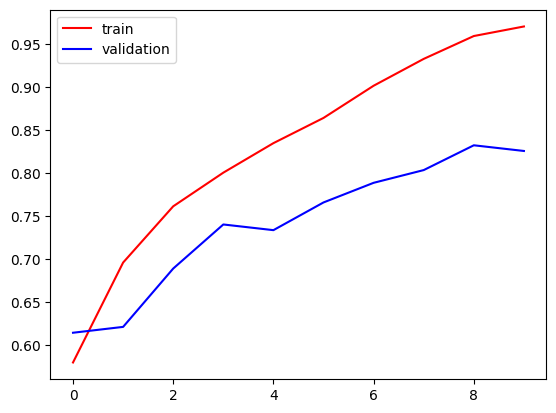

In [18]:
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

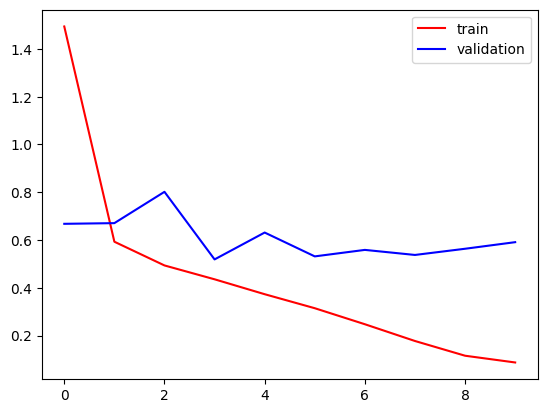

In [19]:
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [20]:
# ways to reduce overfitting

# add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Compexity


In [25]:
# Save the model
model.save('cat_dog_model.h5')


In [26]:
from google.colab import files
files.download('cat_dog_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>